In [5]:
from plotnine import *
import json
import pandas as pd

In [2]:
with open('../results-2024-01-28-metrics.json') as jsonfile:
    metrics = json.load(jsonfile)

/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


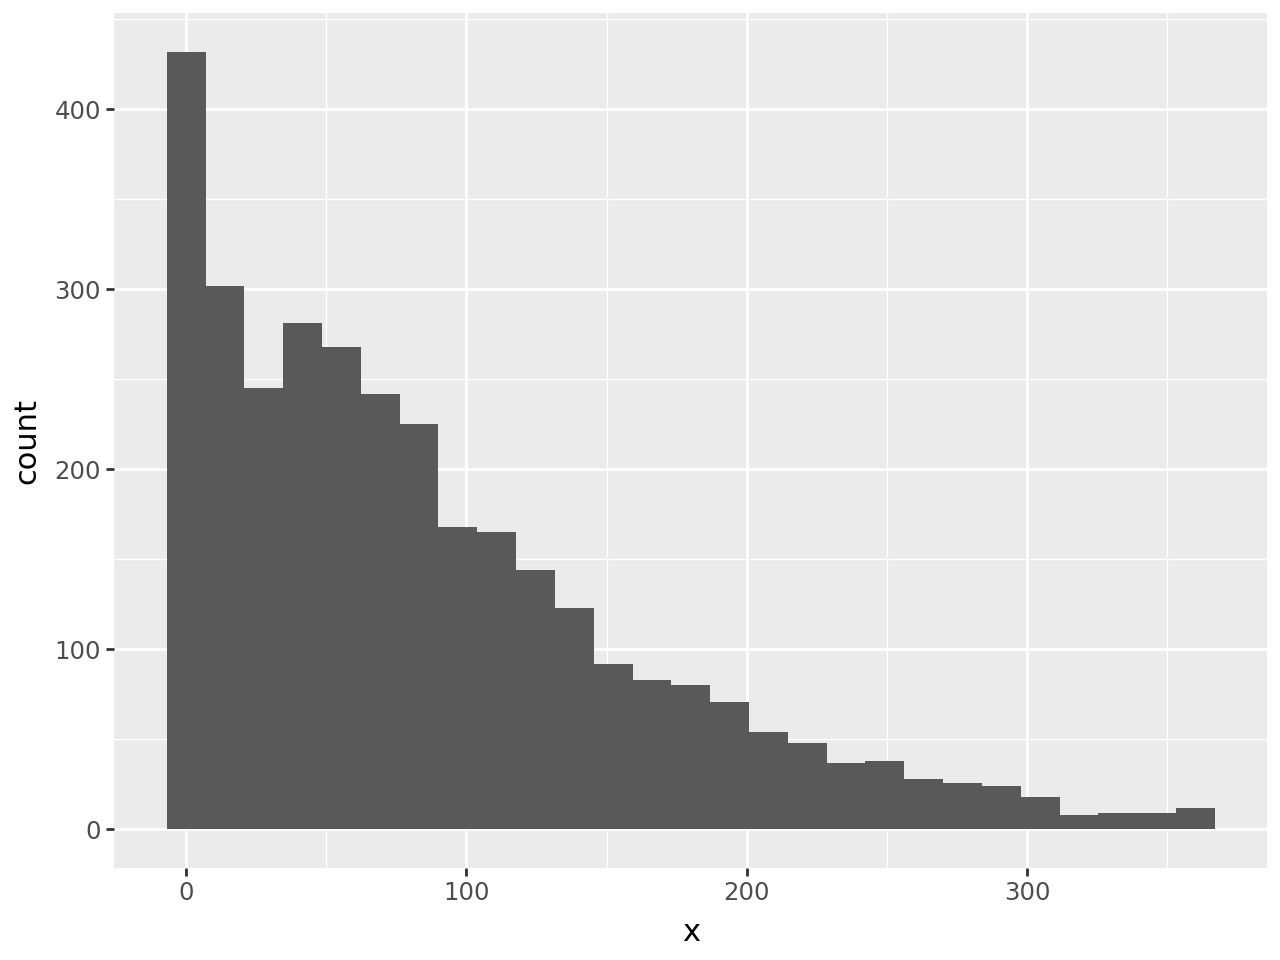

In [8]:
ggplot(pd.DataFrame({'x': pd.Series(metrics['delays'])})) + geom_histogram(aes(x='x'))

In [10]:
def simplify_reason(reason: str) -> str:
    key, _, data = reason.partition('(')
    match key:
        case 'Disrupted':
            station = data.partition(' from ')[0][-3:]
            return f'Disrupted by {station}'
        case _:
            return key

delay_dist = {}
for k, v in metrics['dep_delay_reasons'].items():
    reason = simplify_reason(k)
    delay_dist.setdefault(reason, 0)
    delay_dist[reason] += v

In [14]:
sorted(delay_dist.items(), key=lambda i: i[1])[-20:]

[('Disrupted by SJC', 3144),
 ('Disrupted by SMF', 3201),
 ('Disrupted by FLL', 3334),
 ('Disrupted by MCI', 3447),
 ('Disrupted by AUS', 3470),
 ('Disrupted by CMH', 4087),
 ('Disrupted by LAX', 5290),
 ('Disrupted by DEN', 5649),
 ('Disrupted by MDW', 5650),
 ('Disrupted by STL', 5864),
 ('Disrupted by HOU', 5947),
 ('Disrupted by ATL', 5967),
 ('Disrupted by OAK', 6067),
 ('Disrupted by MCO', 6516),
 ('Disrupted by BWI', 6610),
 ('Disrupted by DAL', 6888),
 ('Disrupted by PHX', 6905),
 ('Disrupted by BNA', 7927),
 ('Disrupted by LAS', 8008),
 ('AircraftShortage', 141130)]

In [16]:
sorted([s for s in metrics['dep_delay_reasons'] if 'LAS' in s])

['Disrupted("Departure delay program at LAS from 2024-01-28 14:00:00 UTC to 2024-01-28 15:00:00 UTC (flights depart at a rate of 10 per hour) due to autogenerated")',
 'Disrupted("Departure delay program at LAS from 2024-01-28 15:00:00 UTC to 2024-01-28 16:00:00 UTC (flights depart at a rate of 19 per hour) due to autogenerated")',
 'Disrupted("Departure delay program at LAS from 2024-01-28 16:00:00 UTC to 2024-01-28 17:00:00 UTC (flights depart at a rate of 22 per hour) due to autogenerated")',
 'Disrupted("Departure delay program at LAS from 2024-01-28 17:00:00 UTC to 2024-01-28 18:00:00 UTC (flights depart at a rate of 18 per hour) due to autogenerated")',
 'Disrupted("Departure delay program at LAS from 2024-01-28 18:00:00 UTC to 2024-01-28 19:00:00 UTC (flights depart at a rate of 12 per hour) due to autogenerated")',
 'Disrupted("Departure delay program at LAS from 2024-01-28 19:00:00 UTC to 2024-01-28 20:00:00 UTC (flights depart at a rate of 10 per hour) due to autogenerated")'